![wer_kommt_zu_wort.jpg](wer_kommt_zu_wort.jpg)
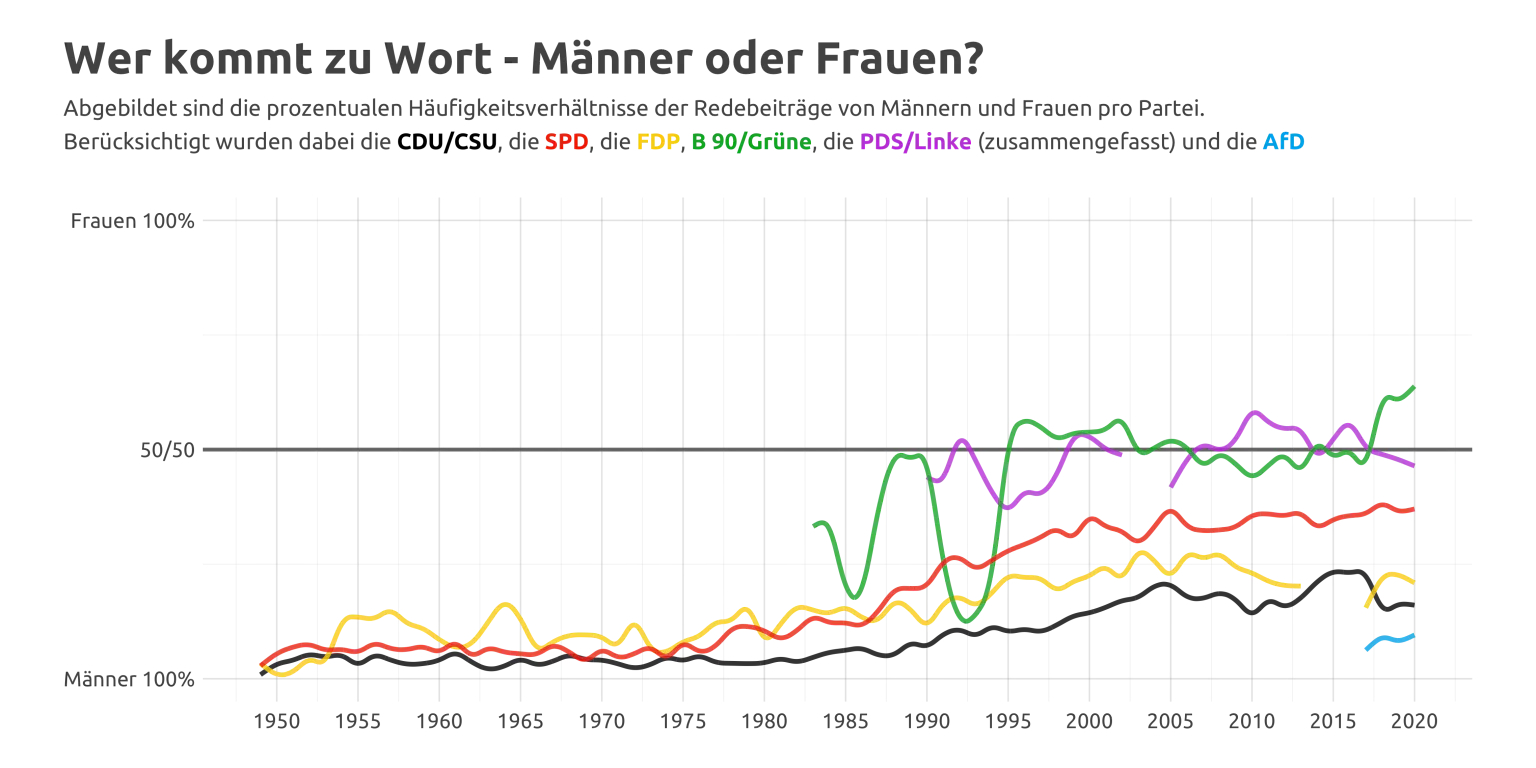

# Wer kommt zu Wort - Männer oder Frauen?

Anlässlich des internationalen Frauentages 2020 veröffentlichte Open Discourse eine anschauliche Grafik, in der abgebildet wird, wie viele Redebeiträge der einzelnen Parteien von Frauen kamen. Um uns mit dem Datensatz vertraut zu machen, haben wir diese Grafik im Folgenden rekonstruiert.

Dieses Notbook gewährt einen Einblick in die Datenstruktur des Open Discourse Datensatzes und dient als Beispiel, wie eine solche Visualisierung in Python mit [Pandas](https://pandas.pydata.org/) erstellt werden kann.

In [1]:
from os.path import join

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
root = join("CSV Files")

In [3]:
speeches = pd.read_csv(join(root, "speeches.csv"))
# remove id
speeches.index = speeches["id"]
speeches = speeches.drop(columns=["id"])

In [4]:
politicians = pd.read_csv(join(root, "politicians.csv"))

In [5]:
factions = pd.read_csv(join(root, "factions.csv"))

In [6]:
speeches

,session,electoralTerm,politicianId,factionId,positionShort,positionLong,speechContent,date
id,,,,,,,,
1,2,1,-1,-1,Guest,präsident des bundesrats,"Der Bundesrat ist versammelt, Herr Präsident.\n",-640749600
3,2,1,-1,-1,Guest,bundespräsident,"Ja, ich habe den Wunsch.\n",-640749600
5,2,1,-1,-1,Guest,bundespräsident,"Verehrte Mitglieder des Bundestags, des Bundes...",-640749600
23,5,1,-1,-1,Chancellor,NaN,NaN,-640058400
123,7,1,-1,21,Member of Parliament,NaN,Meine Damen und Herren! Der Herr Bundeskanzler...,-639885600
...,...,...,...,...,...,...,...,...
845846,242,18,11004973,-1,Minister,bundesministerin für bildung und forschung,"\nWenn ich es alleine machen könnte, könnte ic...",1498600800
845849,242,18,11004973,-1,Minister,bundesministerin für bildung und forschung,"\nNatürlich habe ich mich sofort, als in der T...",1498600800
846479,244,18,11004973,-1,Minister,bundesministerin für bildung und forschung,\nFrau Präsidentin! Verehrte Abgeordnete! Mein...,1498773600


Hier filtern wir den DataFrame nach Reden, bei denen Politiker\*in und Fraktion zugeordnet wurde:

In [7]:
polit_speeches = speeches[speeches["politicianId"] != -1]
polit_speeches = polit_speeches[polit_speeches["factionId"] != -1]

Nun fügen wir dem DataFrame für jede Rede die entsprechenden Spalten für Politiker\*in und Fraktion hinzu:

In [8]:
polit_speeches = polit_speeches.merge(politicians, left_on="politicianId", right_on="id")

In [9]:
polit_speeches = polit_speeches.merge(factions, left_on="factionId", right_on="id")

In [10]:
polit_speeches

,session,electoralTerm,politicianId,factionId,positionShort,positionLong,speechContent,date,id_x,firstName,...,academicTitle,aristocracy,birthCountry,birthPlace,birthYear,deathYear,profession,id_y,abbreviation,fullName
0,38,5,11000001,4,Member of Parliament,NaN,Frau Präsidentin! Meine Damen und Herren! Ich ...,-115606800,11000001,Manfred,...,Prof. Dr.,NaN,Deutschland,Stuttgart,1930-10-20,2008-01-17,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...",4,CDU/CSU,Christlich Demokratische Union Deutschlands/Ch...
1,41,5,11000001,4,Member of Parliament,NaN,Meine Damen und Herren! Mir ist zwar nicht gan...,-114483600,11000001,Manfred,...,Prof. Dr.,NaN,Deutschland,Stuttgart,1930-10-20,2008-01-17,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...",4,CDU/CSU,Christlich Demokratische Union Deutschlands/Ch...
2,41,5,11000001,4,Member of Parliament,NaN,"Herr Dorn, ich bin gern bereit, auf diese Frag...",-114483600,11000001,Manfred,...,Prof. Dr.,NaN,Deutschland,Stuttgart,1930-10-20,2008-01-17,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...",4,CDU/CSU,Christlich Demokratische Union Deutschlands/Ch...
3,42,5,11000001,4,Member of Parliament,NaN,Herr Präsident! Meine Damen und Herren! Ich mö...,-114397200,11000001,Manfred,...,Prof. Dr.,NaN,Deutschland,Stuttgart,1930-10-20,2008-01-17,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...",4,CDU/CSU,Christlich Demokratische Union Deutschlands/Ch...
4,111,5,11000001,4,Member of Parliament,NaN,Herr Präsident! Meine Damen und Herren! Ich ve...,-81133200,11000001,Manfred,...,Prof. Dr.,NaN,Deutschland,Stuttgart,1930-10-20,2008-01-17,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...",4,CDU/CSU,Christlich Demokratische Union Deutschlands/Ch...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366265,183,19,11004937,0,Member of Parliament,NaN,"\n\nDanke, Herr Präsident. – Doch in Ihrem Ant...",1602115200,11004937,Uwe,...,NaN,NaN,Deutschland,Witten,1959-10-01,NaN,"Dipl.-Personalwirt, Betriebsschlosser, Staatl....",0,AfD,Alternative für Deutschland
366266,186,19,11004937,0,Member of Parliament,NaN,\n\nSehr geehrter Herr Präsident! Werte Kolleg...,1603929600,11004937,Uwe,...,NaN,NaN,Deutschland,Witten,1959-10-01,NaN,"Dipl.-Personalwirt, Betriebsschlosser, Staatl....",0,AfD,Alternative für Deutschland
366267,186,19,11004937,0,Member of Parliament,NaN,\n\nSehr geehrte Frau Präsidentin! Werte Kolle...,1603929600,11004937,Uwe,...,NaN,NaN,Deutschland,Witten,1959-10-01,NaN,"Dipl.-Personalwirt, Betriebsschlosser, Staatl....",0,AfD,Alternative für Deutschland
366268,189,19,11004937,0,Member of Parliament,NaN,\n\nSehr geehrte Frau Präsidentin! Werte Kolle...,1604534400,11004937,Uwe,...,NaN,NaN,Deutschland,Witten,1959-10-01,NaN,"Dipl.-Personalwirt, Betriebsschlosser, Staatl....",0,AfD,Alternative für Deutschland


Jetzt filtern wir unseren DataFrame nach den Fraktionen, die in der aktuellen Wahlperiode im Bundestag vertreten sind:

In [11]:
polit_speeches["abbreviation"].unique()

array(['CDU/CSU', 'FDP', 'SPD', 'KPD', 'DP', 'Gast', 'BP', 'FU', 'Z',
       'Grüne', 'Fraktionslos', 'GB/BHE', 'DA', 'FVP', 'PDS', 'SSW',
       'DIE LINKE.', 'WAV', 'NR', 'DRP', 'AfD'], dtype=object)

In [12]:
# merge linke and pds
faction_names = polit_speeches["abbreviation"]
polit_speeches.loc[(faction_names == "DIE LINKE.") | (faction_names == "PDS"), "abbreviation"] = "PDS/DIE LINKE."
# only choose subset of factions to plot
relevant_factions = ["Grüne", "PDS/DIE LINKE.", "AfD", "CDU/CSU", "SPD", "FDP"]
relevant_speeches = polit_speeches[polit_speeches.apply(lambda row: row["abbreviation"] in relevant_factions, axis=1)]

In [13]:
# define color list corresponding to the factions to plot
polit_colors = ['b', 'k',  'yellow', 'lime', 'm', 'r']

Für einen ersten Plot zählen wir die Redebeiträge der Fraktionen in den einzelenen Wahlperioden:

In [14]:
count_term_faction = relevant_speeches.groupby("abbreviation").apply(lambda faction: faction.groupby("electoralTerm").apply(lambda group: len(group)))

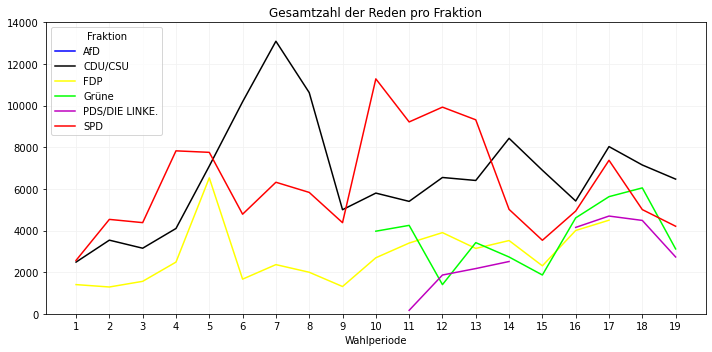

In [15]:
ax = count_term_faction.unstack(level=0).plot(kind='line', subplots=False, figsize=(10, 5), color=polit_colors)

plt.title("Gesamtzahl der Reden pro Fraktion")
plt.grid(axis='both', color='0.95')
plt.ylim(0, 14000)
ax.set_xticks(range(1, 20))
plt.xlabel("Wahlperiode")
plt.legend(title="Fraktion", loc=2)
plt.tight_layout()

Nun berechnen wir das Verhältnis zwischen männlichen und weiblichen Redebeiträgen pro Wahlperiode:

In [16]:
def male_female_ratio(df):
    females = df[df["gender"] != "männlich"]
    ratio = len(females) / len(df)
    return ratio

In [17]:
ratio_female_term_faction = relevant_speeches.groupby("abbreviation").apply(lambda faction: faction.groupby("electoralTerm").apply(lambda group: male_female_ratio(group)))

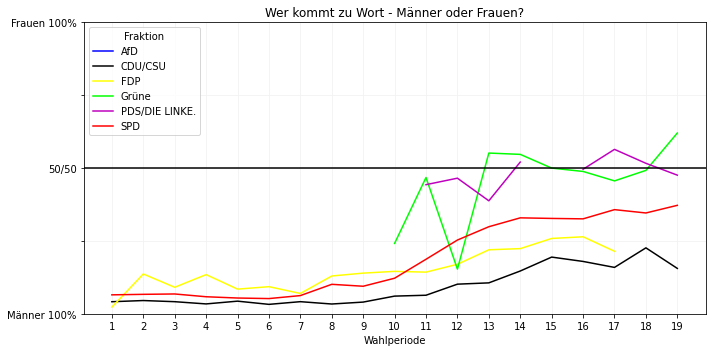

In [18]:
ax = ratio_female_term_faction.unstack(level=0).plot(kind='line', subplots=False, figsize=(10, 5), color=polit_colors)

plt.title("Wer kommt zu Wort - Männer oder Frauen?")
plt.ylim(0, 1)
ax.set_xticks(range(1, 20))
plt.xlabel("Wahlperiode")
ax.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(['Männer 100%', '', '50/50', '', 'Frauen 100%'])
plt.axhline(0.5, 0, 1, color="black", linestyle="solid")
plt.grid(axis='both', color='0.95')
plt.legend(title="Fraktion", loc=2)
plt.tight_layout()

### Fast fertig!
Der Plot sieht schon ziemlich gut aus, allerdings ist die Veranschaulichung für Wahlperioden recht grob. Die AfD-Fraktion ist beispielsweise erst in der aktuellen Wahlperiode verteten und ist somit in unserem Plot nicht veranschaulicht. Im nächsten Schritt konvertieren wir die `POSIX timestamps` in's UTC Format und errechnen das Geschlechterverhältnis pro Jahr für jede Fraktion.

In [19]:
from datetime import datetime, timedelta

def posix_to_timedelta(timestamp):
    if timestamp < 0:
        return datetime(1970, 1, 1) + timedelta(seconds=timestamp)
    else:
        return datetime.utcfromtimestamp(timestamp)

In [20]:
year_relevant_speeches = relevant_speeches.copy(deep=True)
year_relevant_speeches["date"] = year_relevant_speeches["date"].apply(lambda x: posix_to_timedelta(int(x)).year)

In [21]:
year_relevant_speeches.head()

,session,electoralTerm,politicianId,factionId,positionShort,positionLong,speechContent,date,id_x,firstName,...,academicTitle,aristocracy,birthCountry,birthPlace,birthYear,deathYear,profession,id_y,abbreviation,fullName
0,38,5,11000001,4,Member of Parliament,NaN,Frau Präsidentin! Meine Damen und Herren! Ich ...,1966,11000001,Manfred,...,Prof. Dr.,NaN,Deutschland,Stuttgart,1930-10-20,2008-01-17,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...",4,CDU/CSU,Christlich Demokratische Union Deutschlands/Ch...
1,41,5,11000001,4,Member of Parliament,NaN,Meine Damen und Herren! Mir ist zwar nicht gan...,1966,11000001,Manfred,...,Prof. Dr.,NaN,Deutschland,Stuttgart,1930-10-20,2008-01-17,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...",4,CDU/CSU,Christlich Demokratische Union Deutschlands/Ch...
2,41,5,11000001,4,Member of Parliament,NaN,"Herr Dorn, ich bin gern bereit, auf diese Frag...",1966,11000001,Manfred,...,Prof. Dr.,NaN,Deutschland,Stuttgart,1930-10-20,2008-01-17,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...",4,CDU/CSU,Christlich Demokratische Union Deutschlands/Ch...
3,42,5,11000001,4,Member of Parliament,NaN,Herr Präsident! Meine Damen und Herren! Ich mö...,1966,11000001,Manfred,...,Prof. Dr.,NaN,Deutschland,Stuttgart,1930-10-20,2008-01-17,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...",4,CDU/CSU,Christlich Demokratische Union Deutschlands/Ch...
4,111,5,11000001,4,Member of Parliament,NaN,Herr Präsident! Meine Damen und Herren! Ich ve...,1967,11000001,Manfred,...,Prof. Dr.,NaN,Deutschland,Stuttgart,1930-10-20,2008-01-17,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...",4,CDU/CSU,Christlich Demokratische Union Deutschlands/Ch...


In [22]:
count_year_faction = year_relevant_speeches.groupby("abbreviation").apply(lambda faction: faction.groupby("date").apply(lambda group: len(group)))

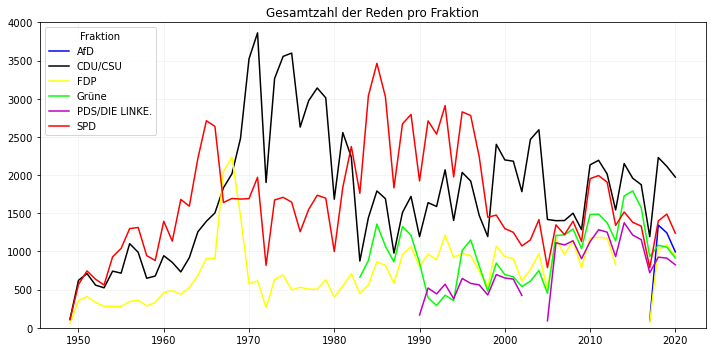

In [23]:
count_year_faction.unstack(level=0).plot(kind='line', subplots=False, figsize=(10, 5), color=polit_colors)

plt.title("Gesamtzahl der Reden pro Fraktion")
plt.grid(axis='both', color='0.95')
plt.ylim(0, 4000)
plt.xlabel("")
plt.legend(title="Fraktion", loc=2)
plt.tight_layout()

In [24]:
ratio_female_year_faction = year_relevant_speeches.groupby("abbreviation").apply(lambda faction: faction.groupby("date").apply(lambda group: male_female_ratio(group)))

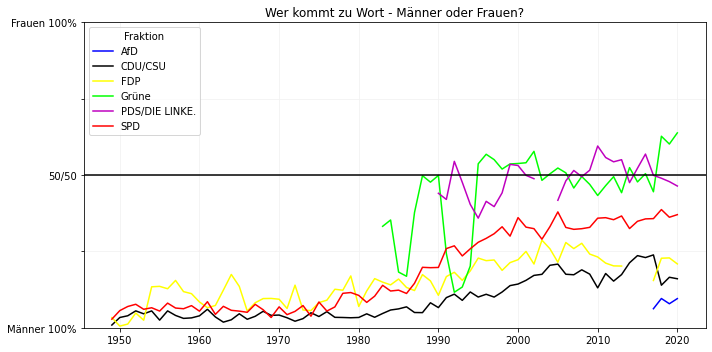

In [25]:
ax = ratio_female_year_faction.unstack(level=0).plot(kind='line', subplots=False, figsize=(10, 5), color=polit_colors)

plt.title("Wer kommt zu Wort - Männer oder Frauen?")
plt.ylim(0, 1)
ax.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(['Männer 100%', '', '50/50', '', 'Frauen 100%'])
plt.axhline(0.5, 0, 1, color="black", linestyle="solid")
plt.grid(axis='both', color='0.95')
plt.xlabel("")
plt.legend(title="Fraktion", loc=2)
plt.tight_layout()

# Fertig! 🥳
Zum Vergleich noch einmal das Original:

![wer_kommt_zu_wort.jpg](wer_kommt_zu_wort.jpg)
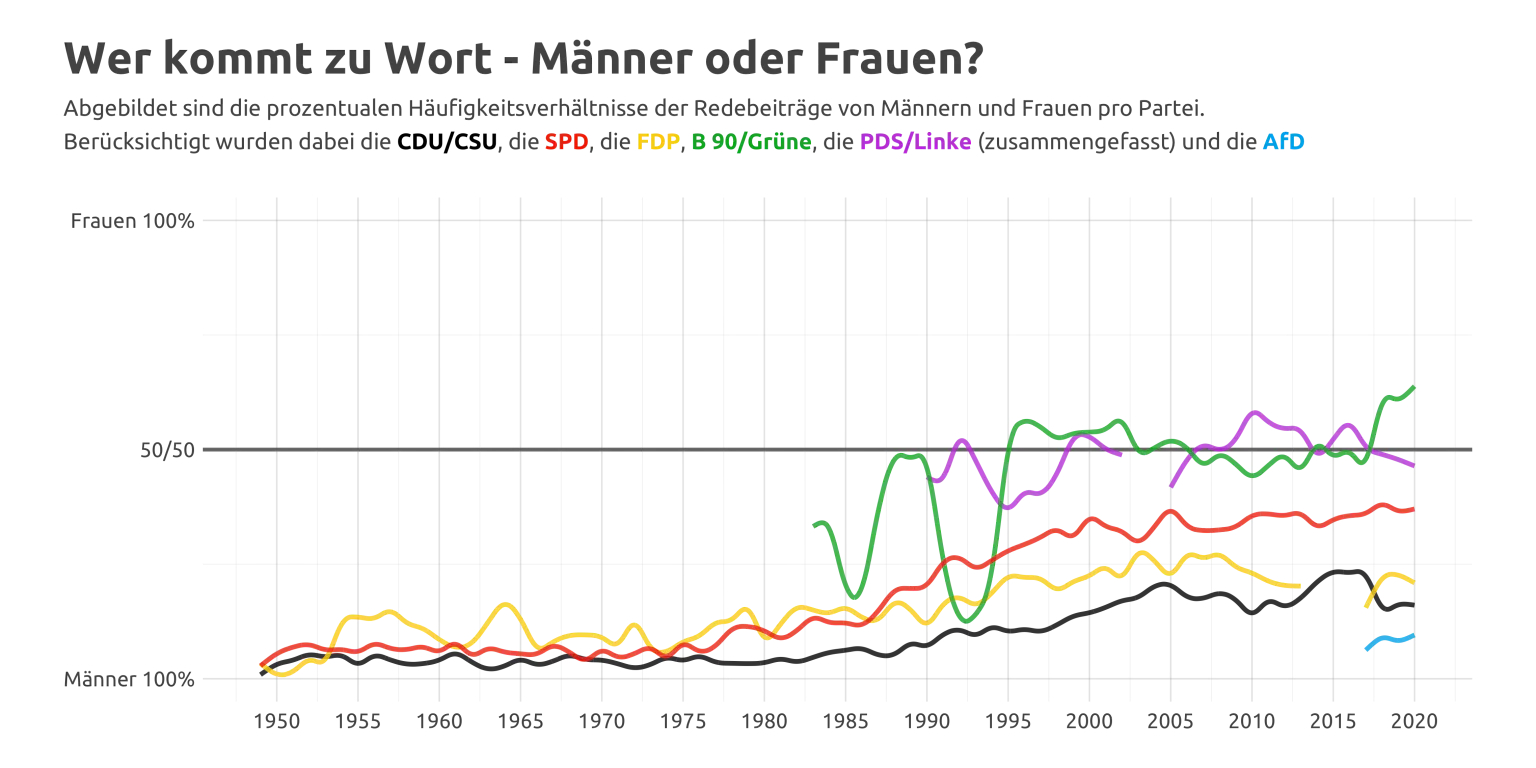